In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [11]:
df = pd.read_csv('model_results/metric_results.csv', index_col=0)
df_timeseries = pd.read_csv('model_results/metric_results_unique_id.csv', index_col=0)
num_timeseries = {'amazon-google':20, 'glucose':16, 'm5':70, 'meditation':6}
metrics = ['mase', 'tce', 'wql', 'msis']
datasets = np.unique(df['dataset'])
# models = np.unique(df['model'])
models = ['timesfm', 'moirai', 'chronos', 'lag-llama', 'nbeats', 'autoarima']
df

,dataset,model,metric,avg_result,1,2,3,4,5,6,...,39,40,41,42,43,44,45,46,47,48
0,amazon-google,timesfm,mase,0.626710,0.430666,0.500570,0.533389,0.549497,0.558109,0.564419,...,0.670660,0.664018,0.669928,0.669465,0.672305,0.673199,0.673113,0.677770,0.674093,0.671572
1,amazon-google,timesfm,tce,0.028167,0.027855,0.029167,0.017130,0.013426,0.014660,0.009028,...,0.040046,0.030710,0.021296,0.040586,0.025309,0.032330,0.029475,0.031559,0.027160,0.030247
2,amazon-google,timesfm,wql,39.109267,0.569183,0.662820,0.702529,0.721602,0.731187,0.739626,...,0.863626,0.857371,0.862537,0.861212,0.865427,0.868556,0.868471,0.873211,0.866997,0.864564
3,amazon-google,timesfm,msis,2.909242,2.118204,2.461185,2.601213,2.660779,2.673880,2.709546,...,3.014958,3.003555,3.013399,3.012433,3.023239,3.017936,3.017048,3.032843,3.014855,3.017230
4,amazon-google,moirai,mase,0.784597,0.563127,0.659972,0.711802,0.725886,0.732351,0.724868,...,0.788507,0.815976,0.804093,0.811530,0.825072,0.817345,0.803175,0.808023,0.812145,0.832979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,meditation,moirai,mis,0.154870,0.109382,0.119901,0.125351,0.128097,0.129487,0.128918,...,0.167518,0.172462,0.172791,0.173803,0.177345,0.176865,0.176626,0.180586,0.182426,0.185259
116,meditation,chronos,mis,0.041304,0.023432,0.029800,0.032301,0.033522,0.033775,0.036075,...,0.045906,0.046291,0.046852,0.046801,0.047075,0.046121,0.046918,0.047996,0.047962,0.047055
117,meditation,lag-llama,mis,0.688752,0.688295,0.727592,0.738963,0.738805,0.736272,0.743163,...,0.637393,0.618181,0.606301,0.608692,0.604238,0.601415,0.590723,0.591464,0.589990,0.587661
118,meditation,nbeats,mis,0.392319,0.388553,0.394727,0.391293,0.389722,0.383095,0.390334,...,0.394145,0.392043,0.395536,0.390054,0.392605,0.394724,0.390225,0.396483,0.389542,0.390667


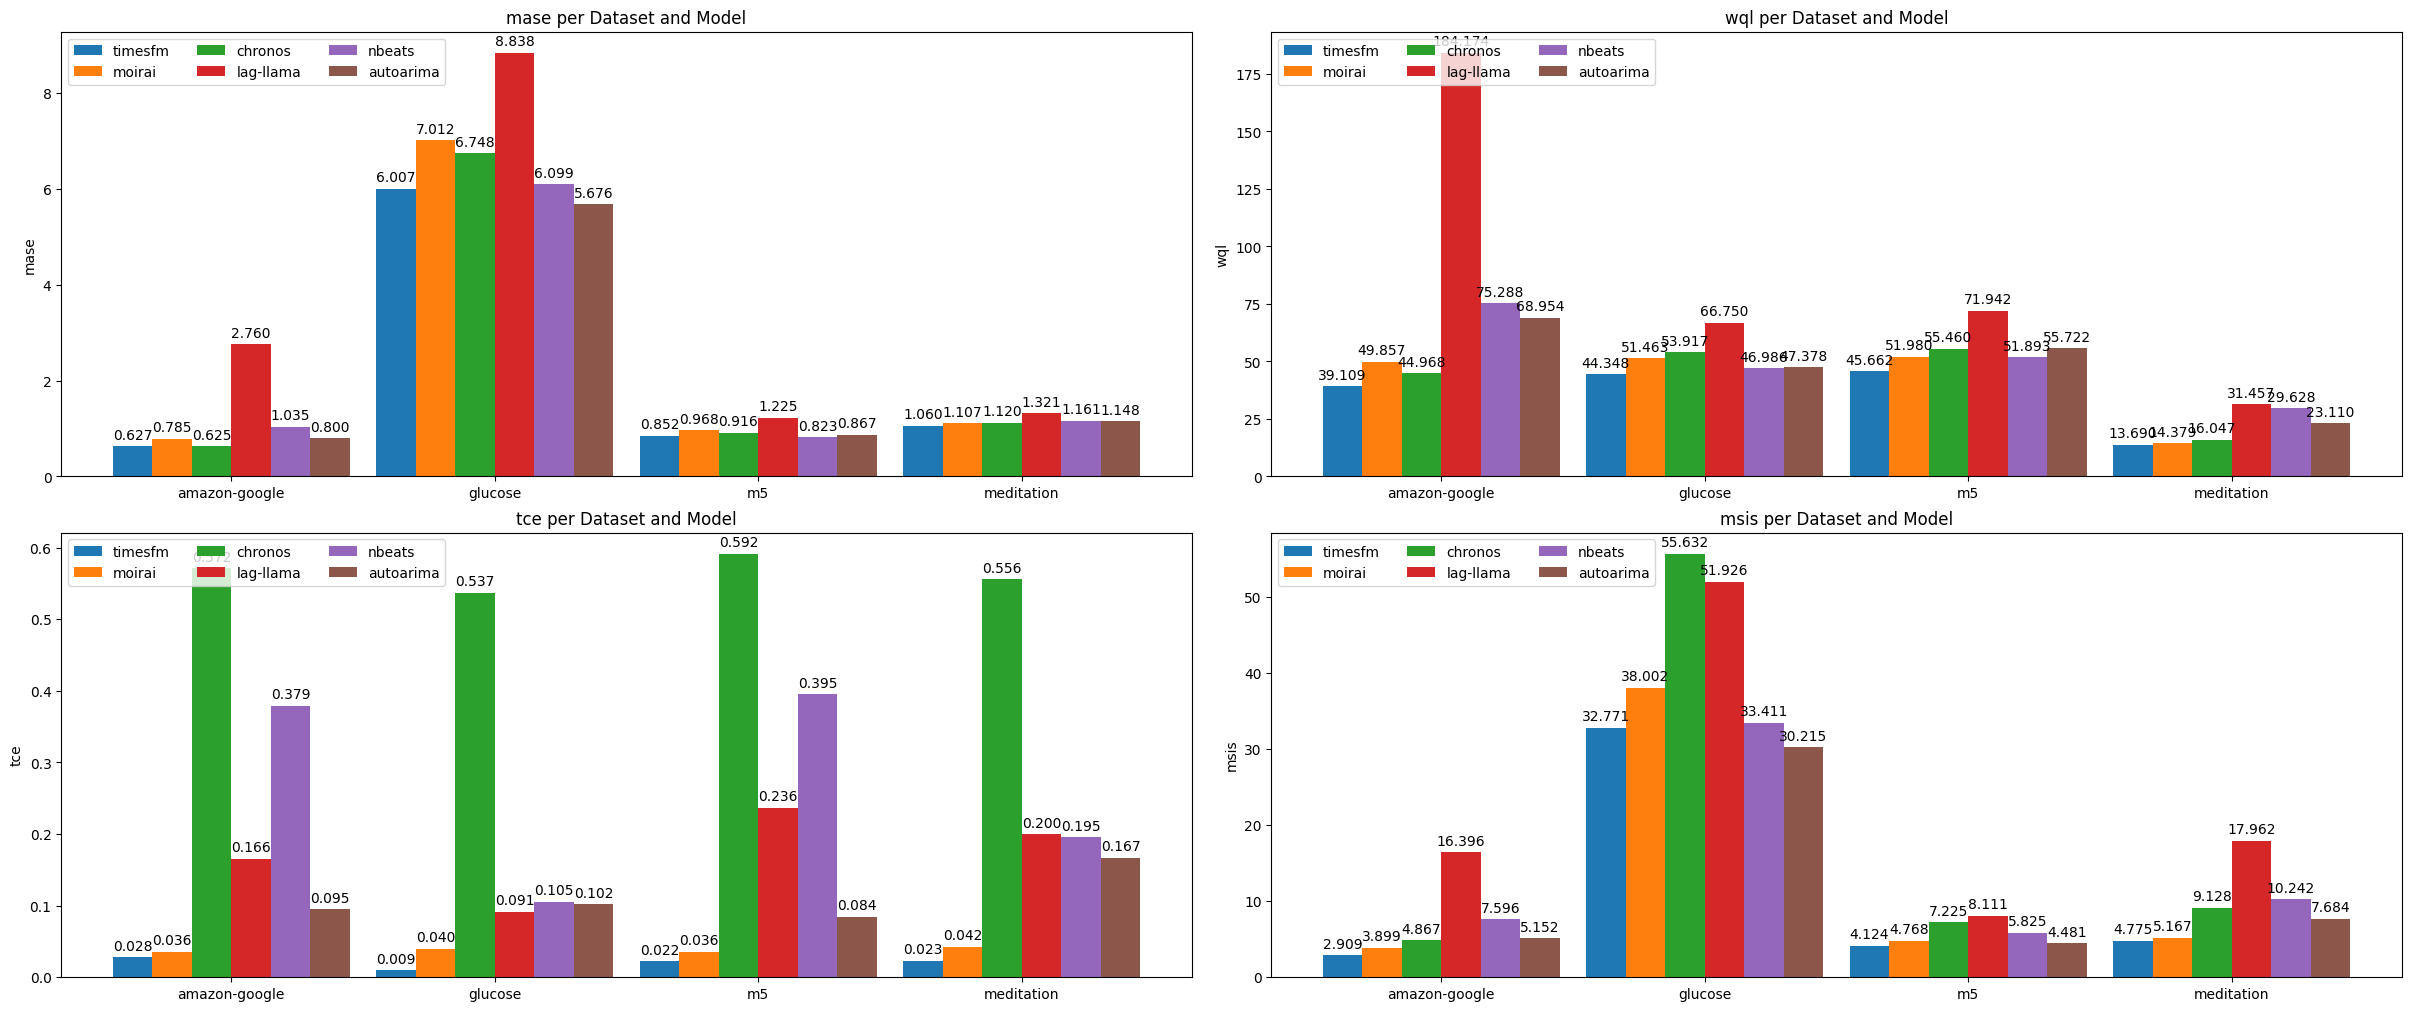

In [12]:
# Bar plot of metrics on different datasets
fig, axes = plt.subplots(2, 2, layout='constrained', figsize=(24,10))
width = 0.15
x = np.arange(len(datasets))
wql_top = 0.03

for i, metric in enumerate(metrics):
    ax = axes[i%2, i//2]
    multiplier = 0
    for model in models:
        values = [df.loc[(df['model']==model) & (df['dataset']==dataset) & (df['metric']==metric), 'avg_result'].item() for dataset in datasets]
        offset = width * multiplier - width*(len(models)/2-1.5)
        rects = ax.bar(x + offset, values, width, label=model)
        ax.bar_label(rects, padding=3, fmt='%.3f')
        multiplier += 1

    ax.set_ylabel(metric)
    ax.set_title(f'{metric} per Dataset and Model')
    ax.set_xticks(x + width, datasets)
    ax.legend(loc='upper left', ncols=3)
plt.savefig('figures/bar_plot_all_metrics_per_dataset_model.png')
plt.show()


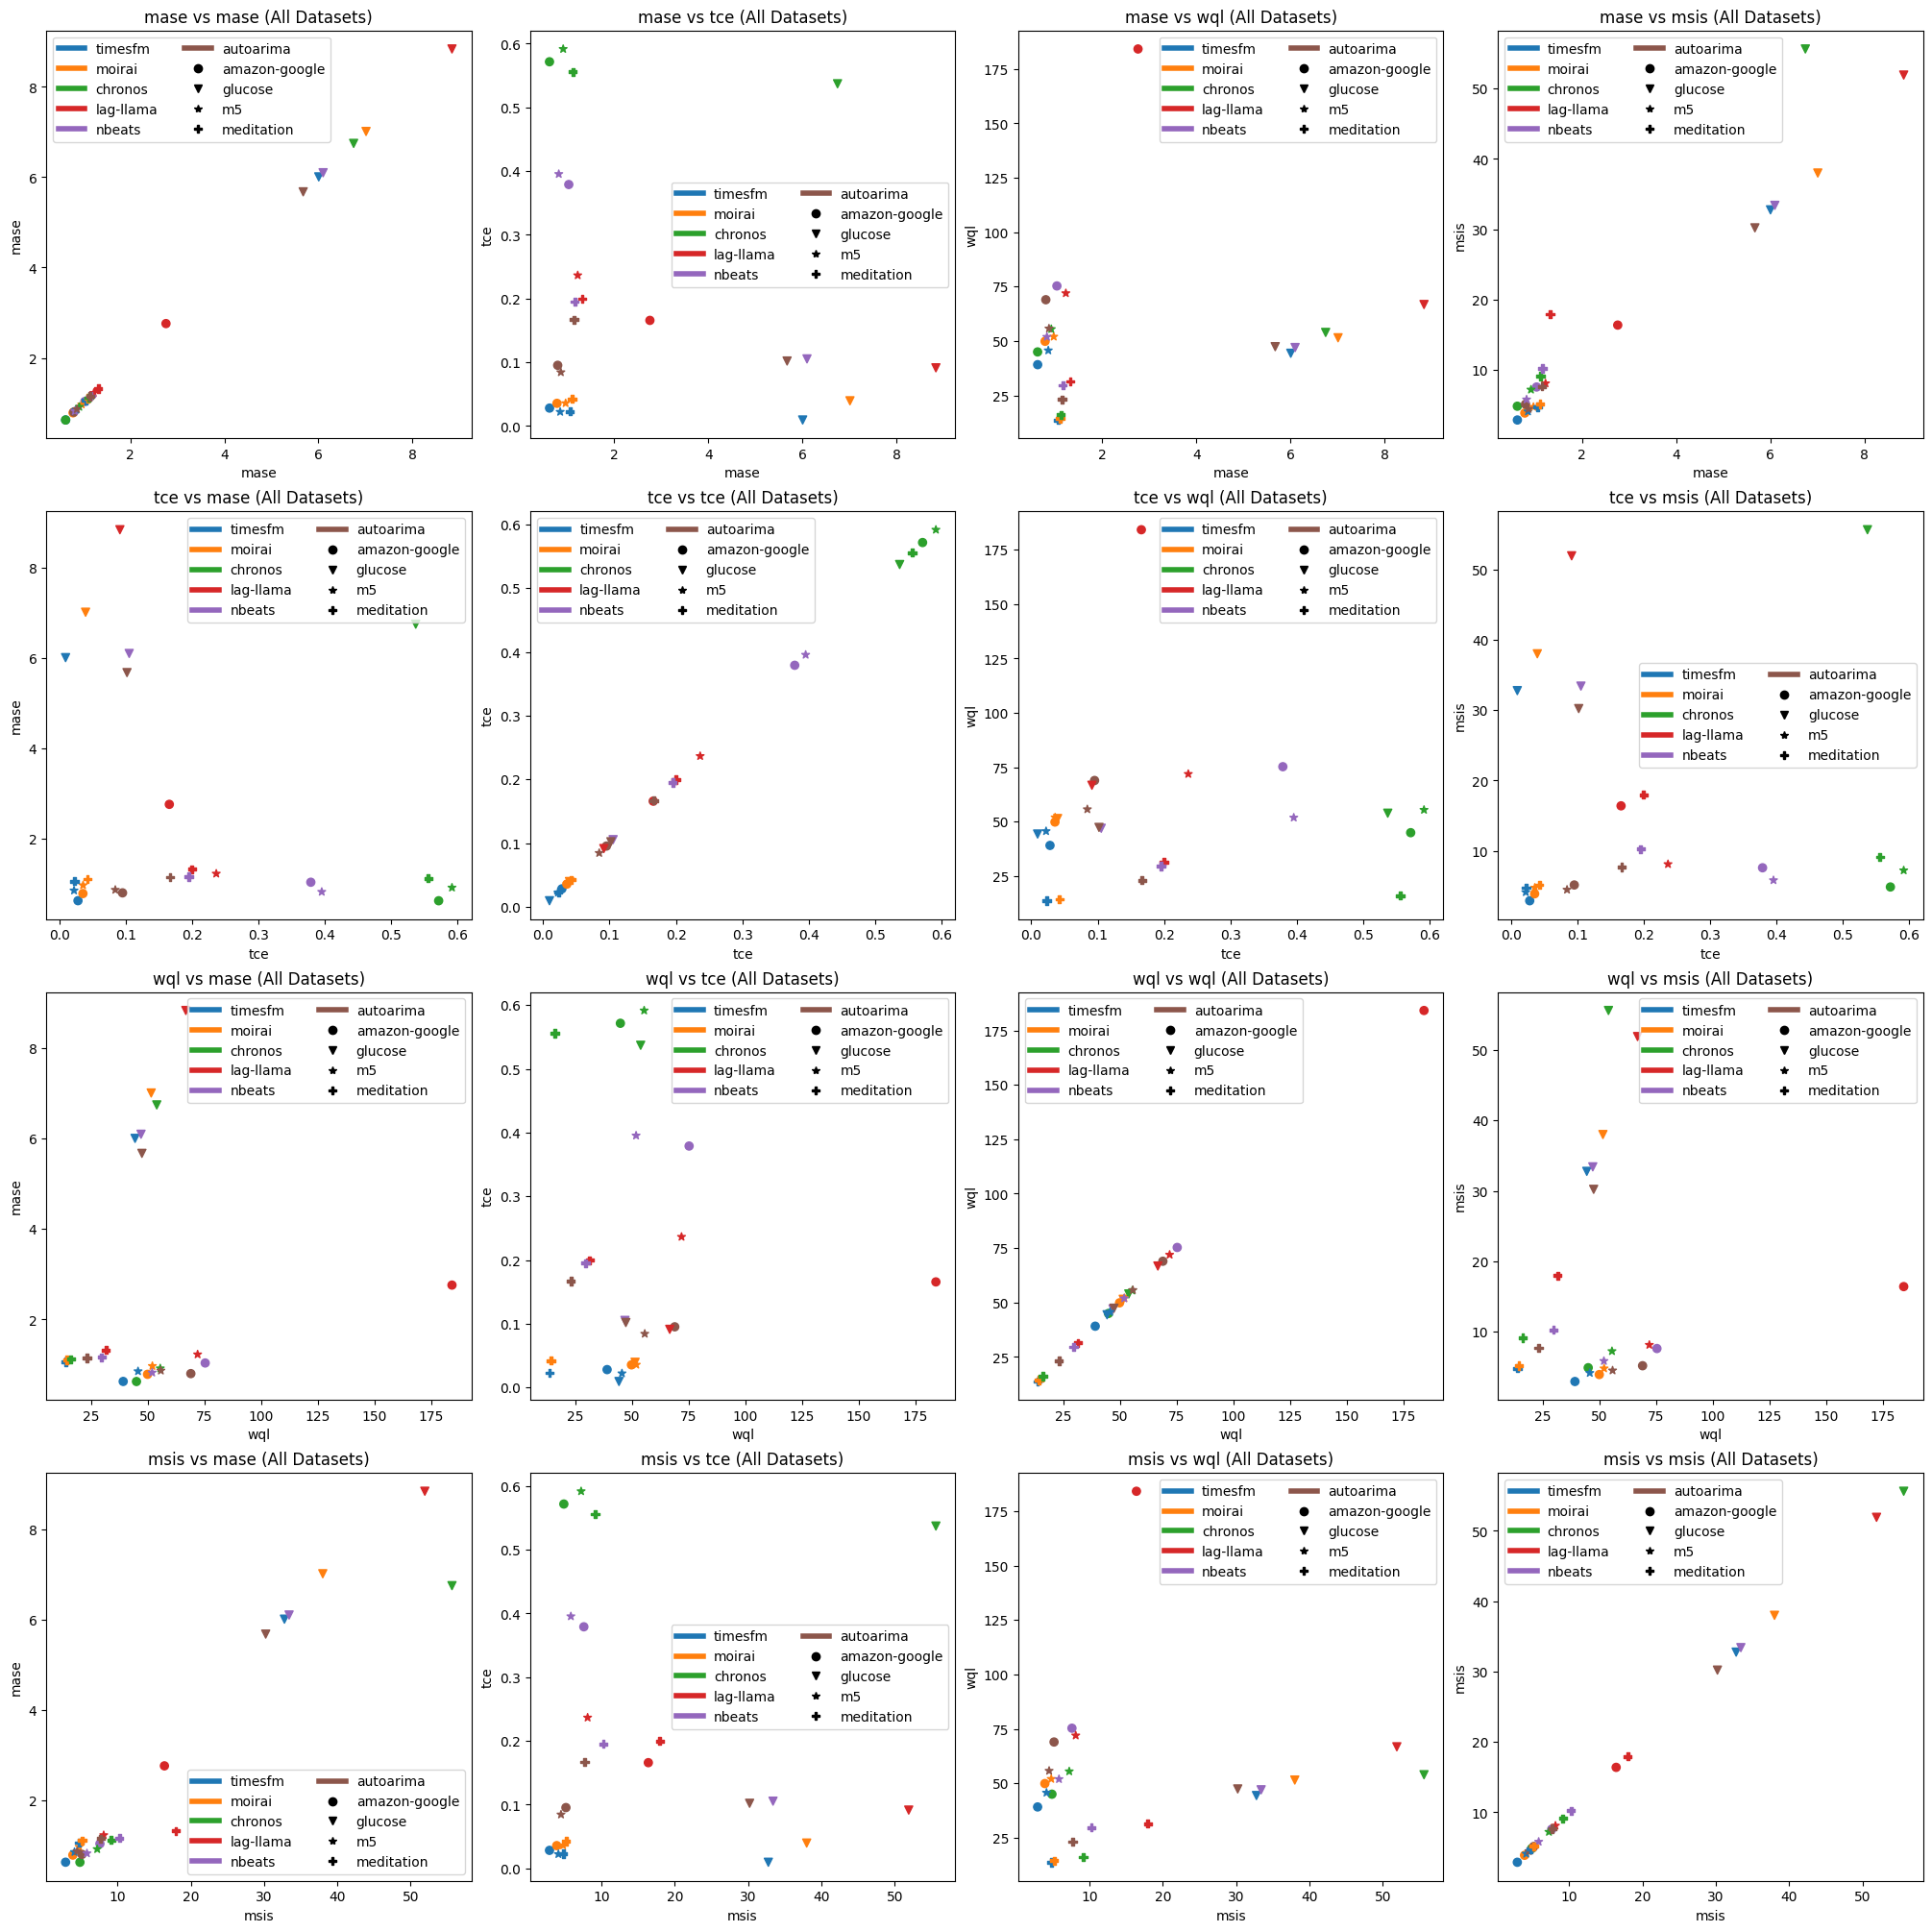

In [13]:
# Metric comparison scatter plots (all datasets)
fig, axes = plt.subplots(4, 4, layout='constrained', figsize=(20,20))
model_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
dataset_markers = ['o', 'v', '*', 'P']
wql_top = 0.03

custom_legend_dots = []
for model, model_color in zip(models, model_colors):
    custom_legend_dots.append(Line2D([0], [0], color=model_color, lw=4, label=model))
for dataset, marker in zip(datasets, dataset_markers):
    custom_legend_dots.append(Line2D([0], [0], color='black', marker=marker, markersize=6, lw=0))


for i, metric_x in enumerate(metrics):
    for j, metric_y in enumerate(metrics):
        ax = axes[i, j]
        for marker, dataset in zip(dataset_markers, datasets):
            x = [df.loc[(df['model']==model) & (df['dataset']==dataset) & (df['metric']==metric_x), 'avg_result'].item() for model in models]
            y = [df.loc[(df['model']==model) & (df['dataset']==dataset) & (df['metric']==metric_y), 'avg_result'].item() for model in models]
            ax.scatter(x, y, c=model_colors, marker=marker)

        ax.set_ylabel(metric_y)
        ax.set_xlabel(metric_x)
        ax.set_title(f'{metric_x} vs {metric_y} (All Datasets)')
        ax.legend(custom_legend_dots, [*models, *datasets], ncols=2)
plt.savefig('figures/scatter_plot_metrics_per_metric.png')
plt.show()
        

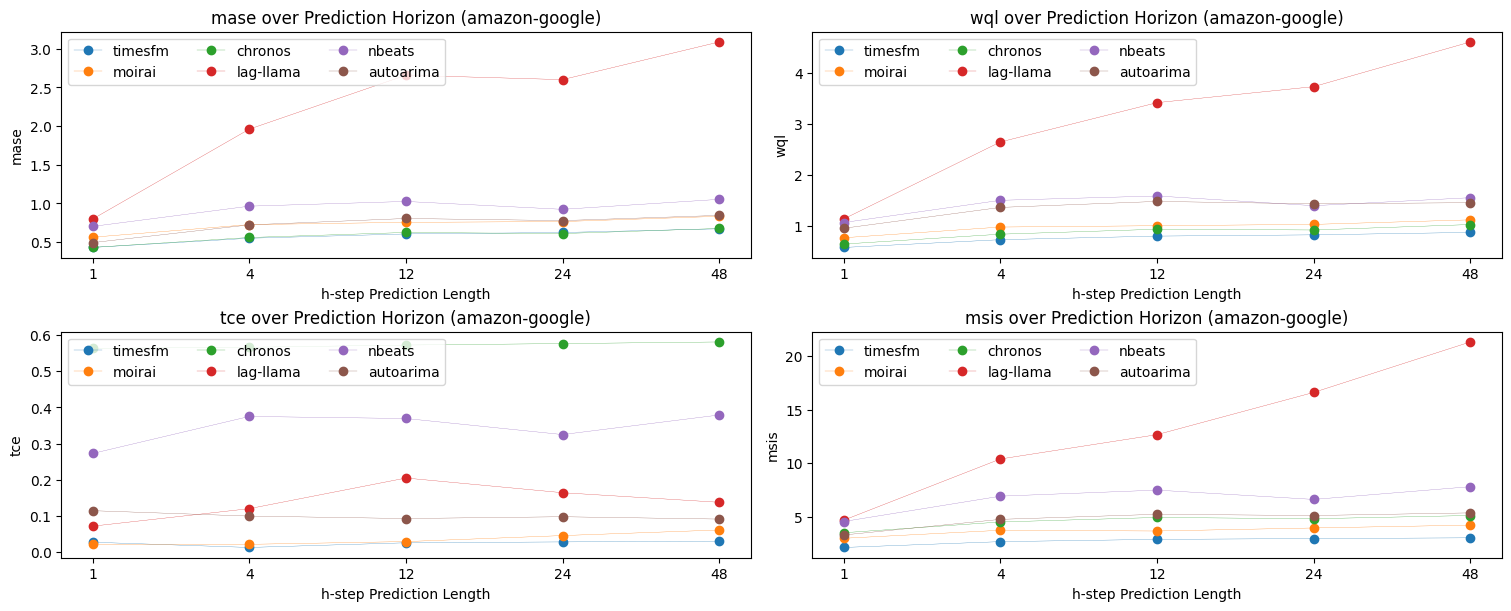

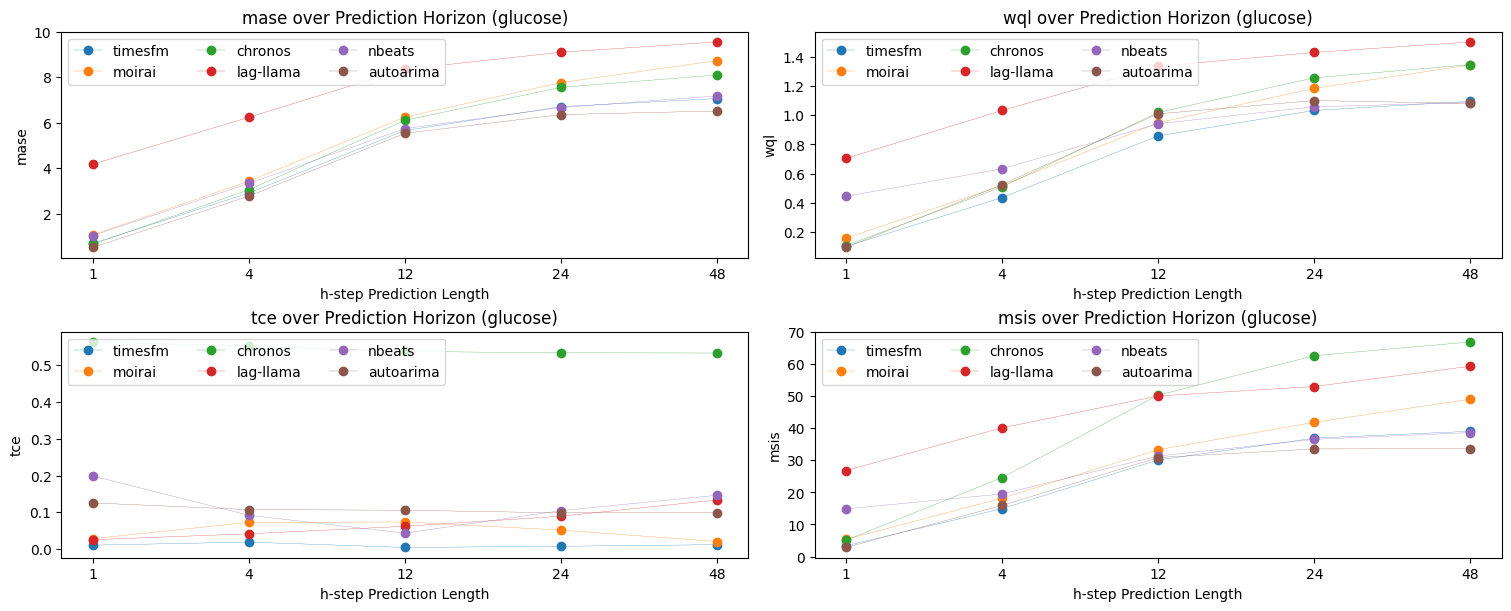

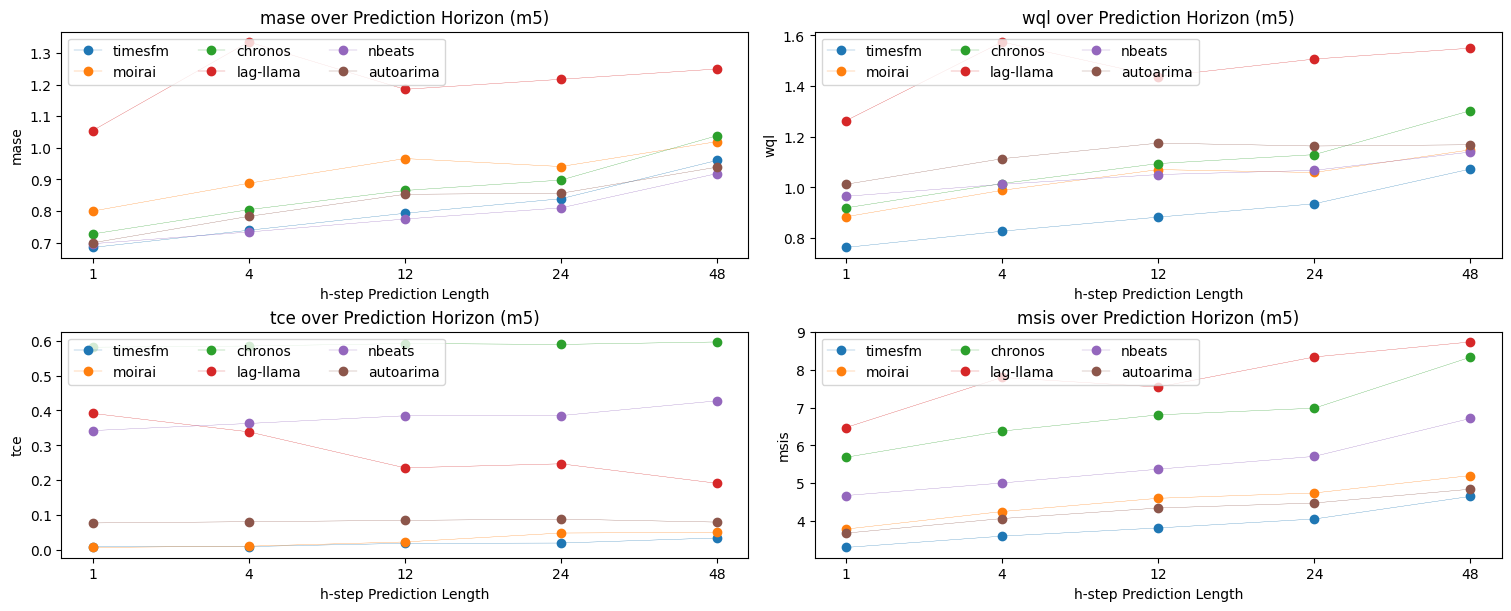

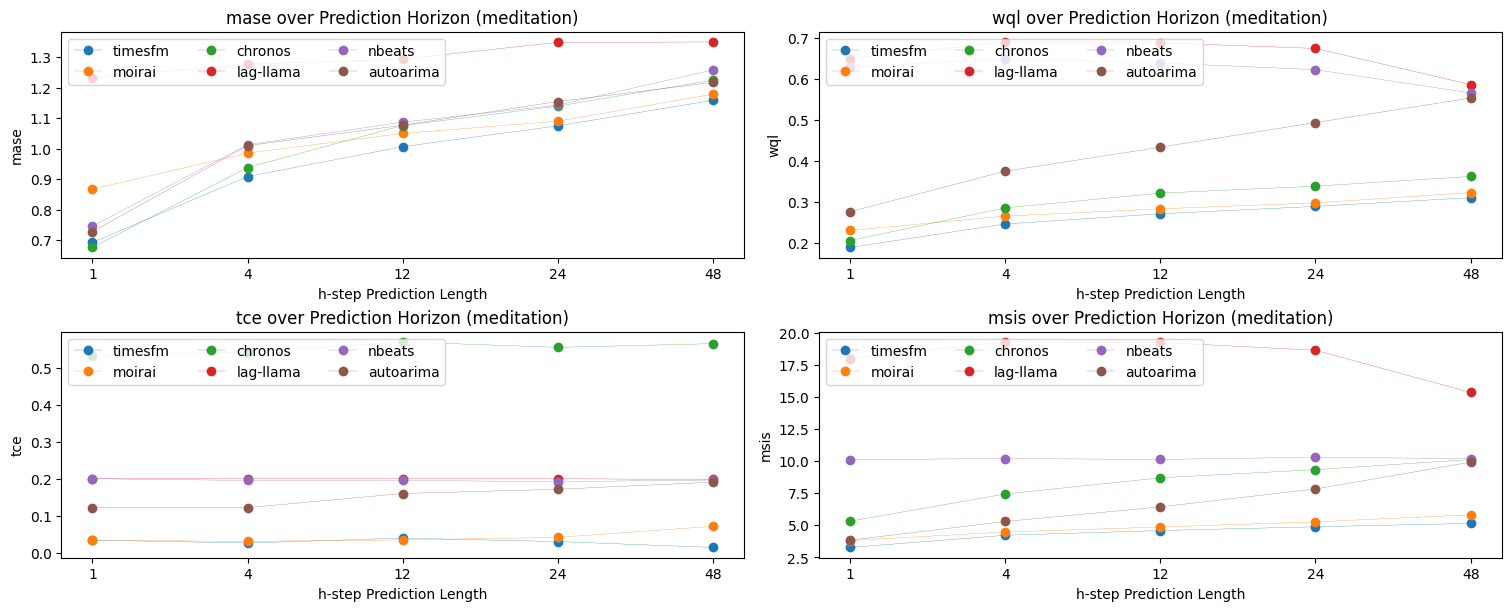

In [14]:
# Line Plot Metrics over prediction distance
pred_horizon = ['1','4','12','24','48']
# dataset = 'amazon-google'

for dataset in datasets:
    fig, axes = plt.subplots(2, 2, layout='constrained', figsize=(15,6))
    for i, metric in enumerate(metrics):
        ax = axes[i%2, i//2]
        for model in models:
            y = df.loc[(df['model']==model) & (df['dataset']==dataset) & (df['metric']==metric), pred_horizon].to_numpy().flatten()
            ax.plot(np.arange(len(pred_horizon)), y, label=model, marker='o', lw=0.2)

        # Add some text for labels, title and custom x-axis tick labels, etc.   
        ax.set_ylabel(metric)
        ax.set_xlabel("h-step Prediction Length")
        ax.set_title(f'{metric} over Prediction Horizon ({dataset})')
        ax.set_xticks(np.arange(len(pred_horizon)), pred_horizon)
        ax.legend(loc='upper left', ncols=3)
    plt.savefig(f'figures/line_plot_all_metrics_per_pred_len_{dataset}.png')
    plt.show()

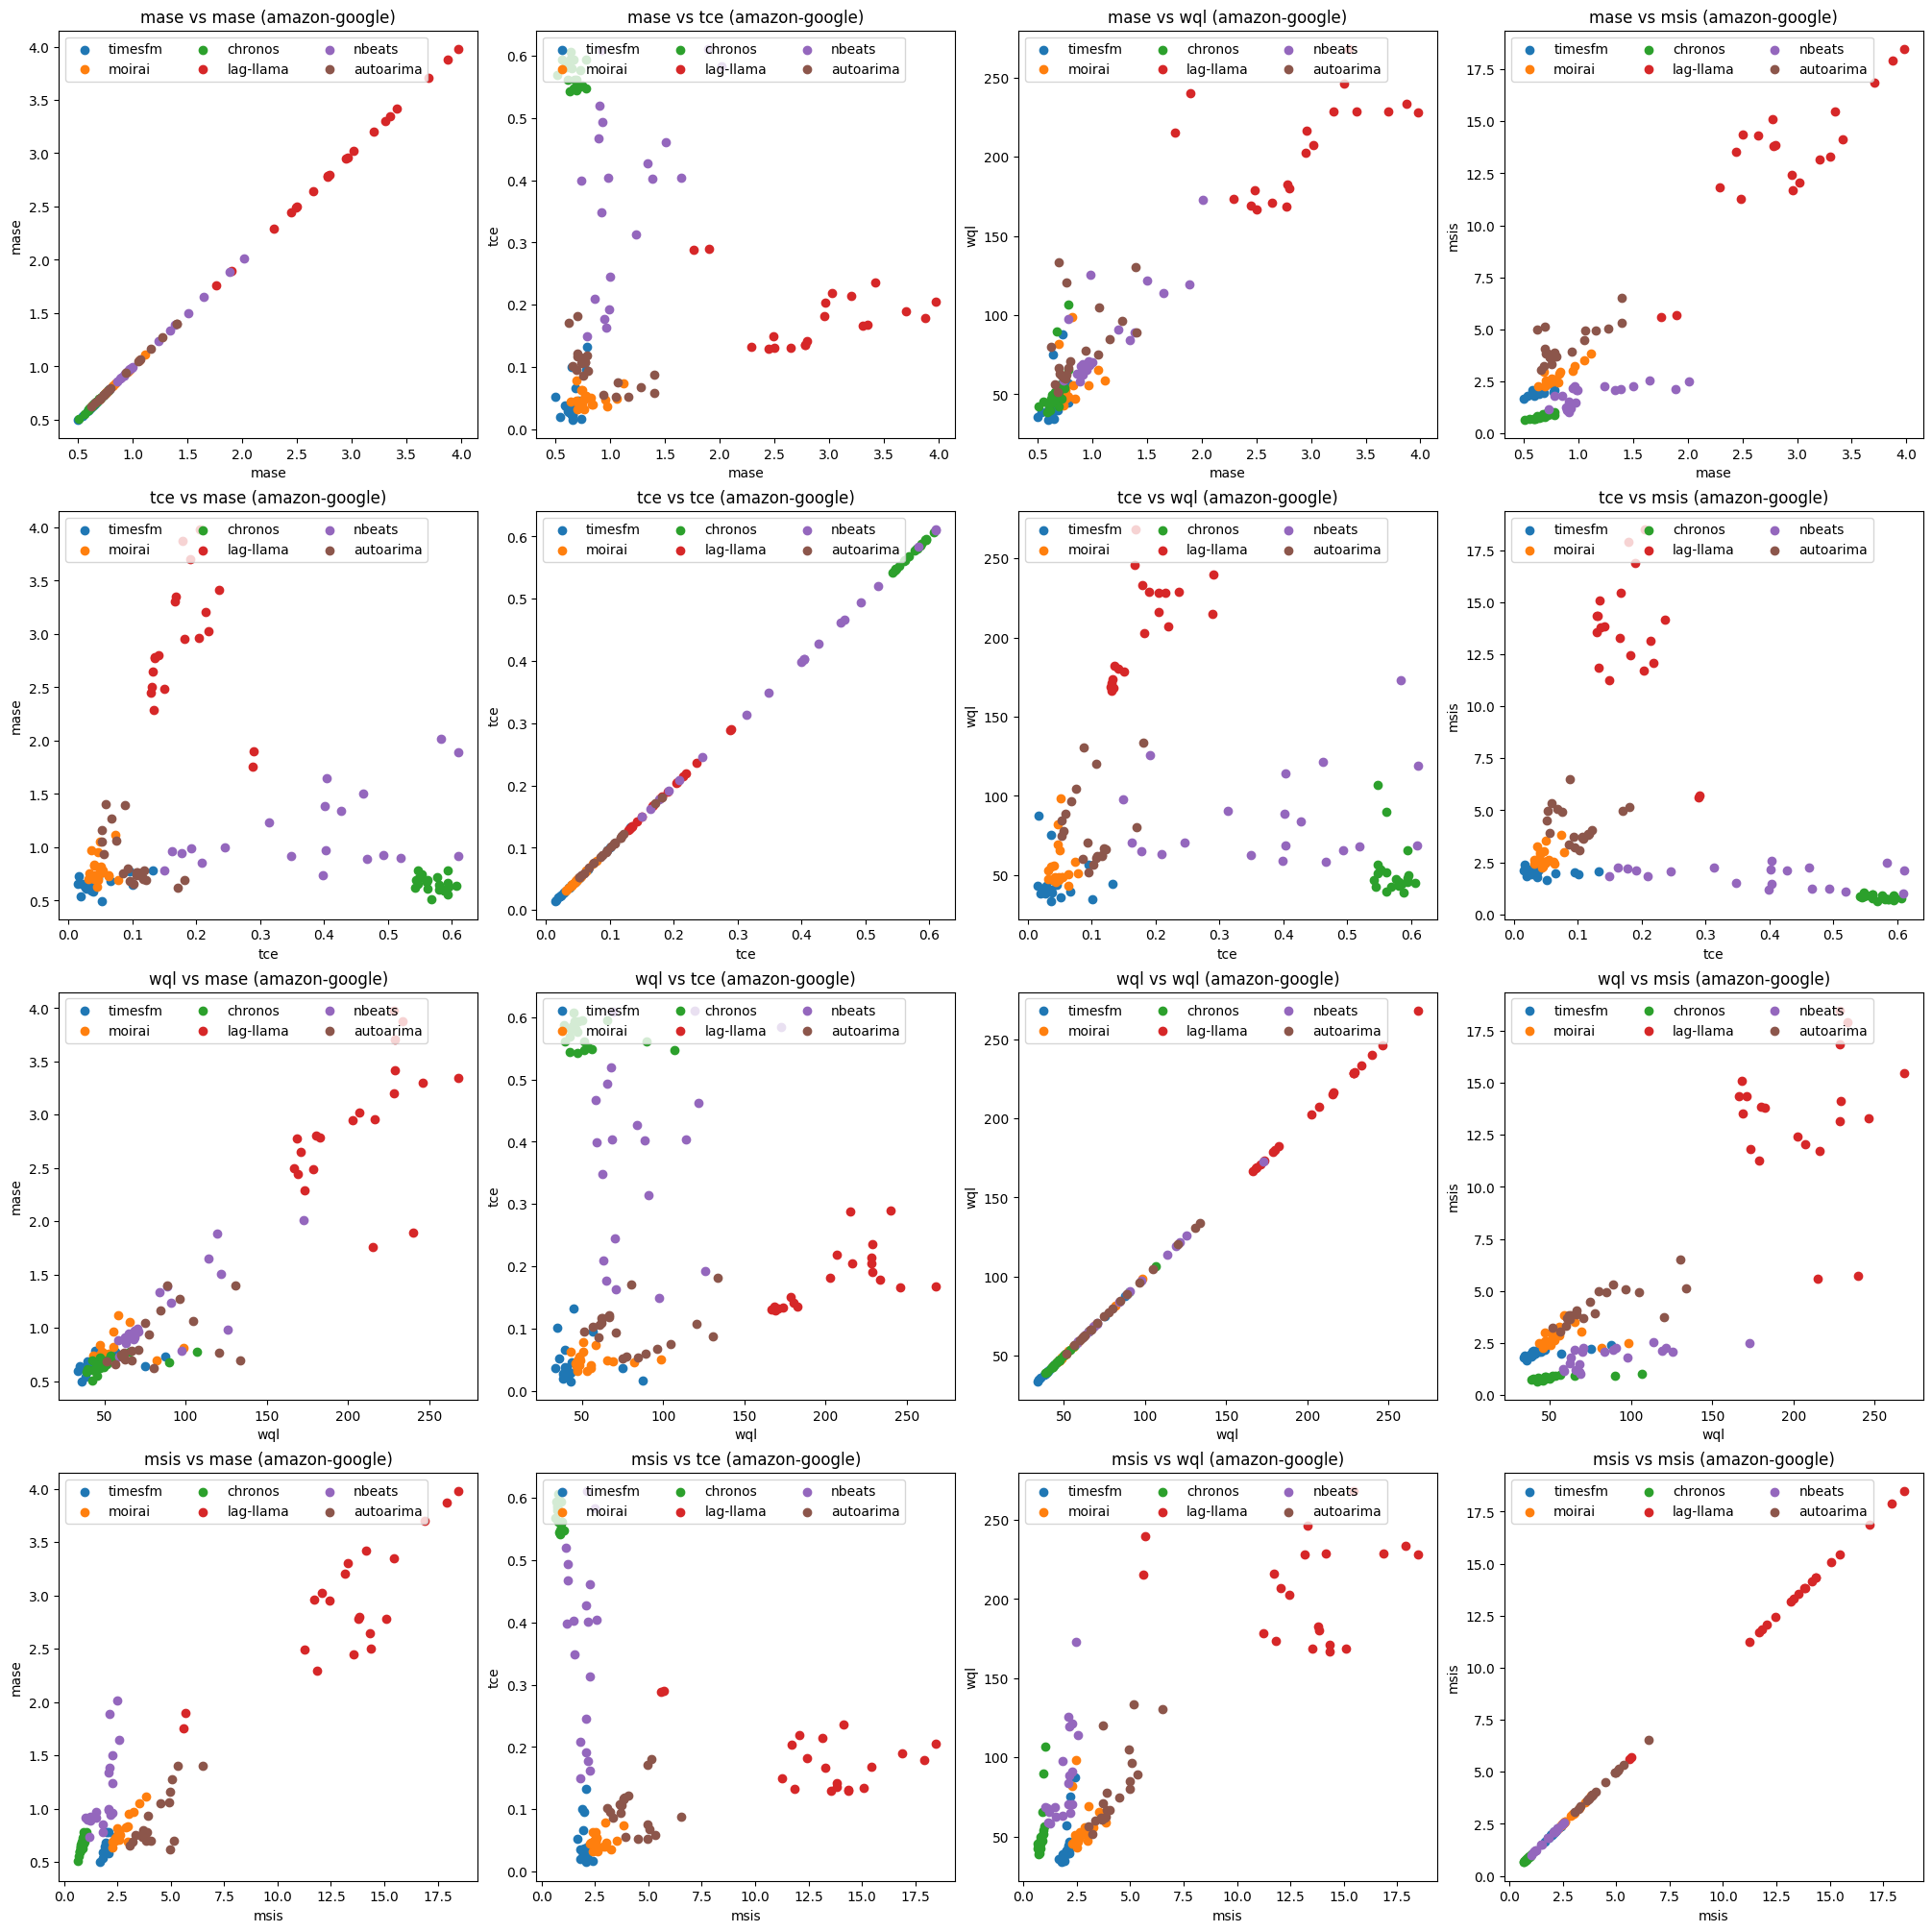

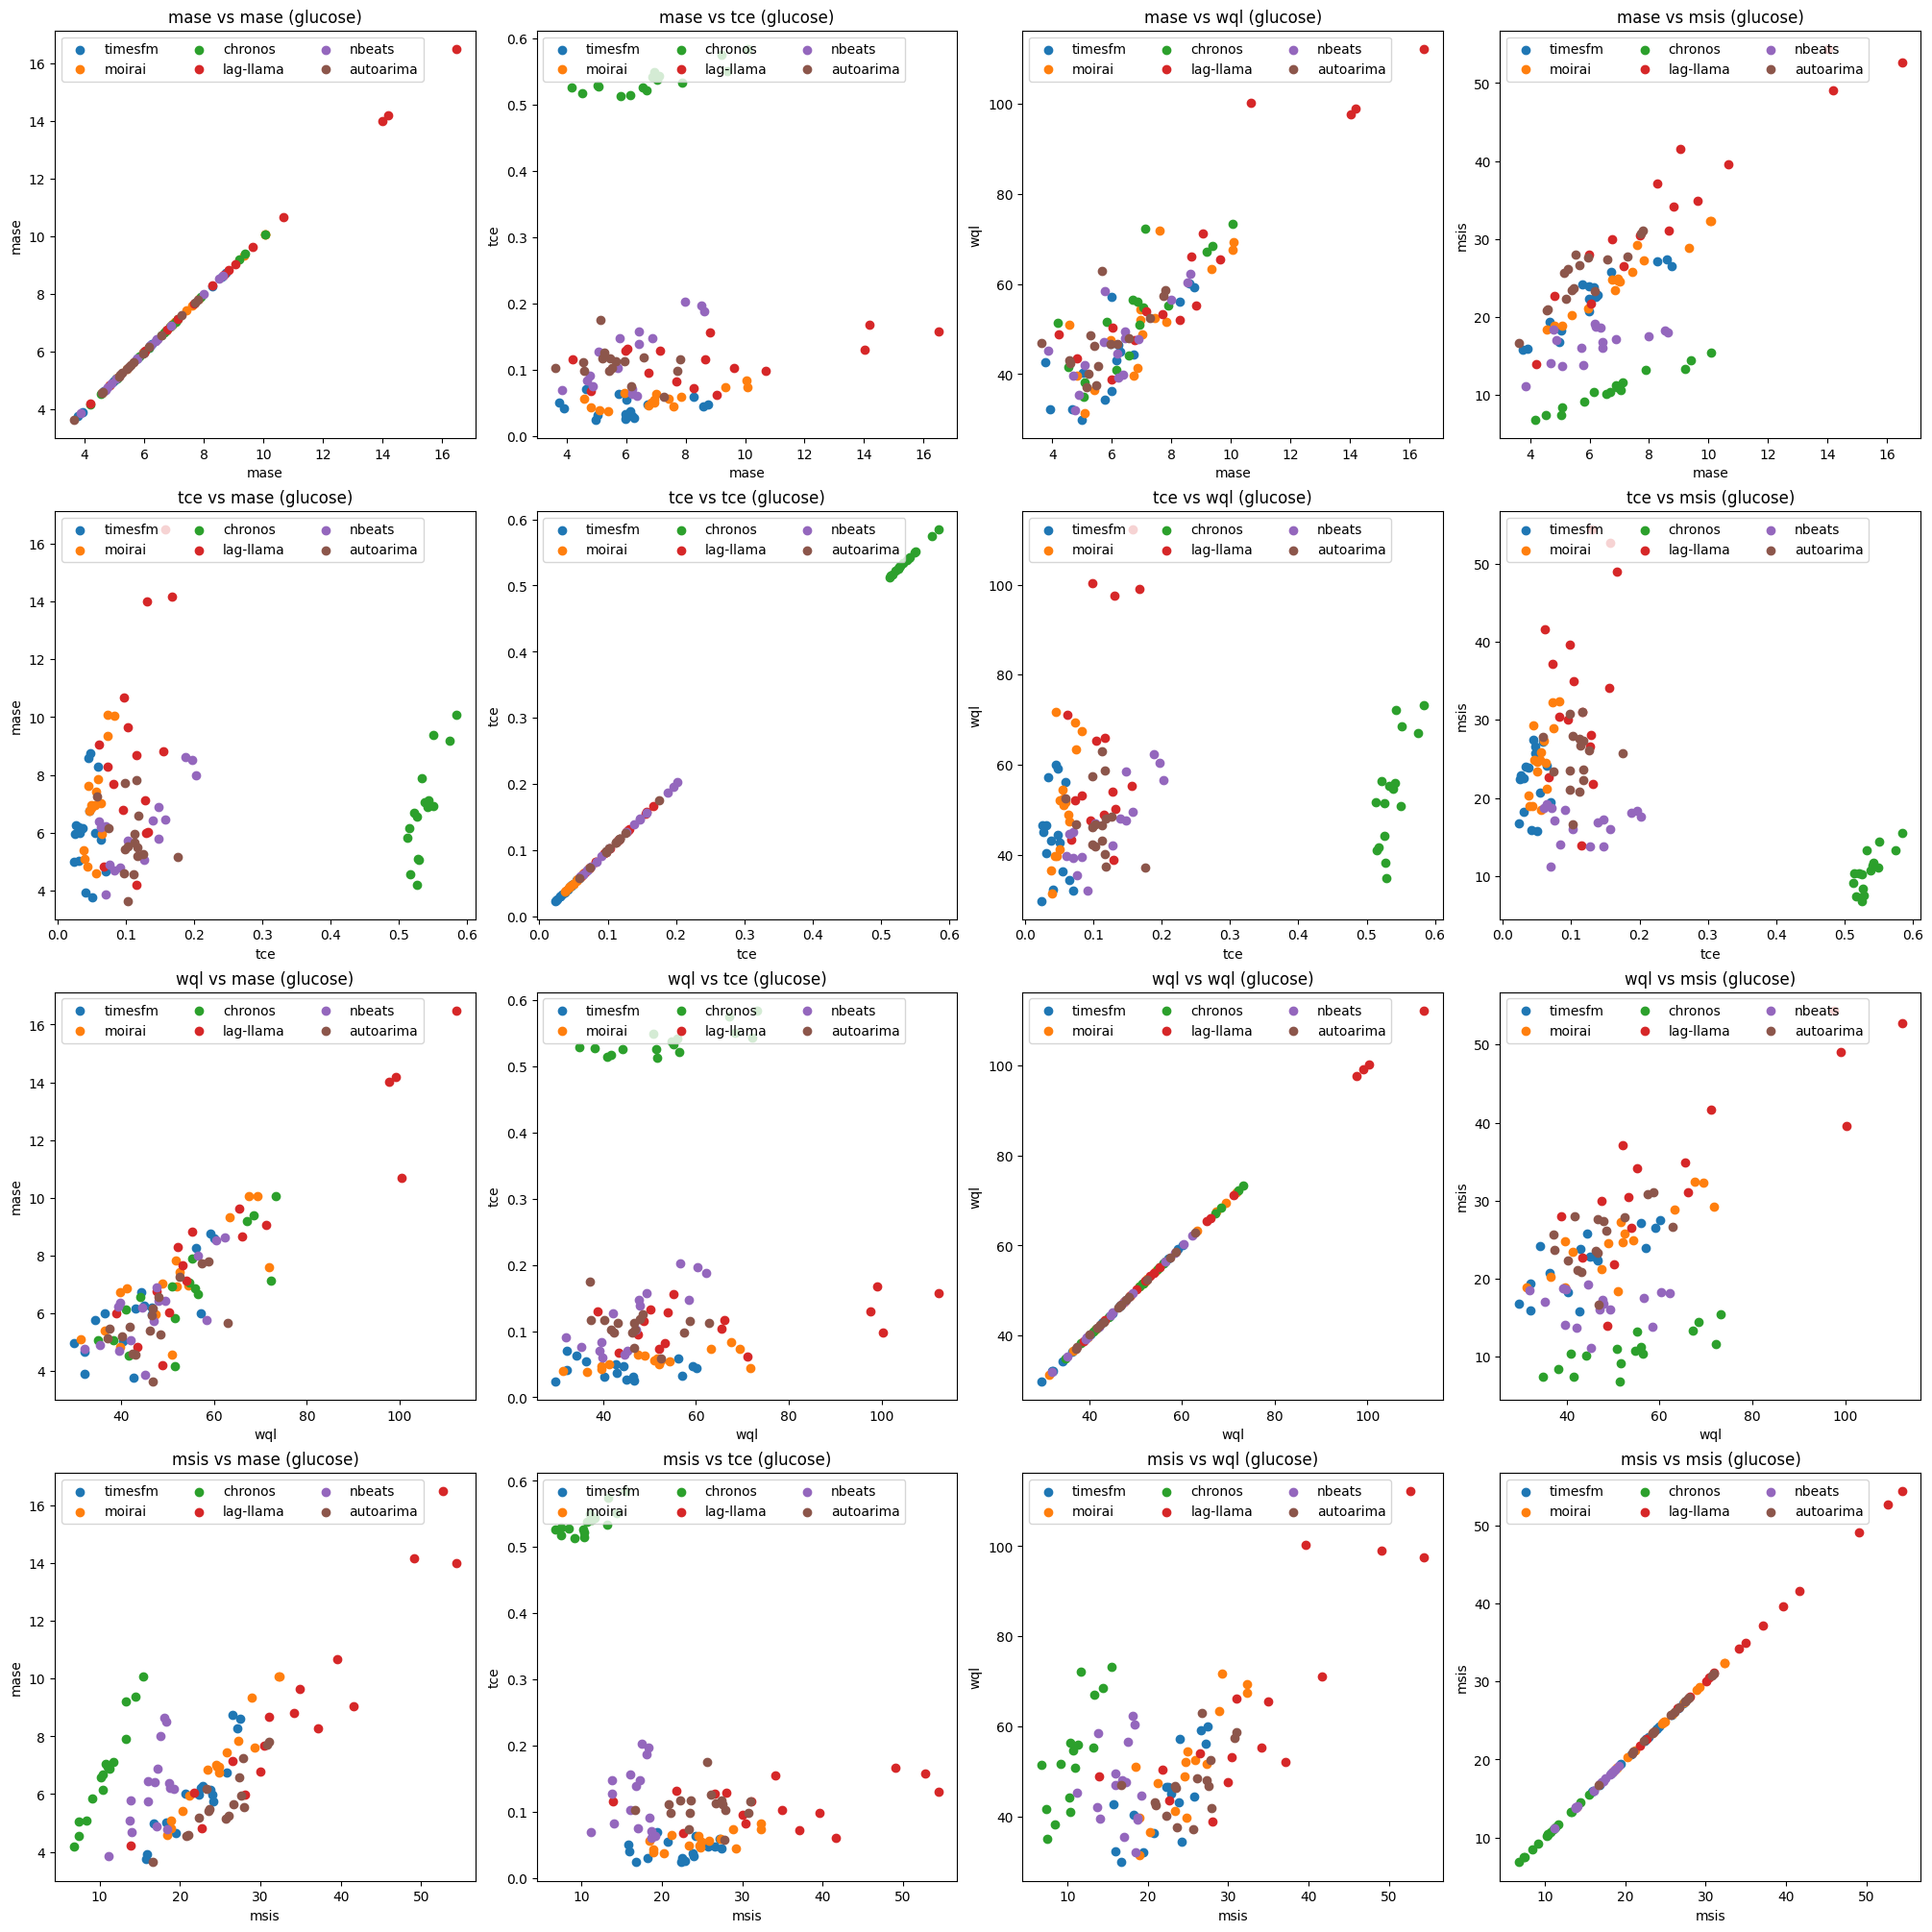

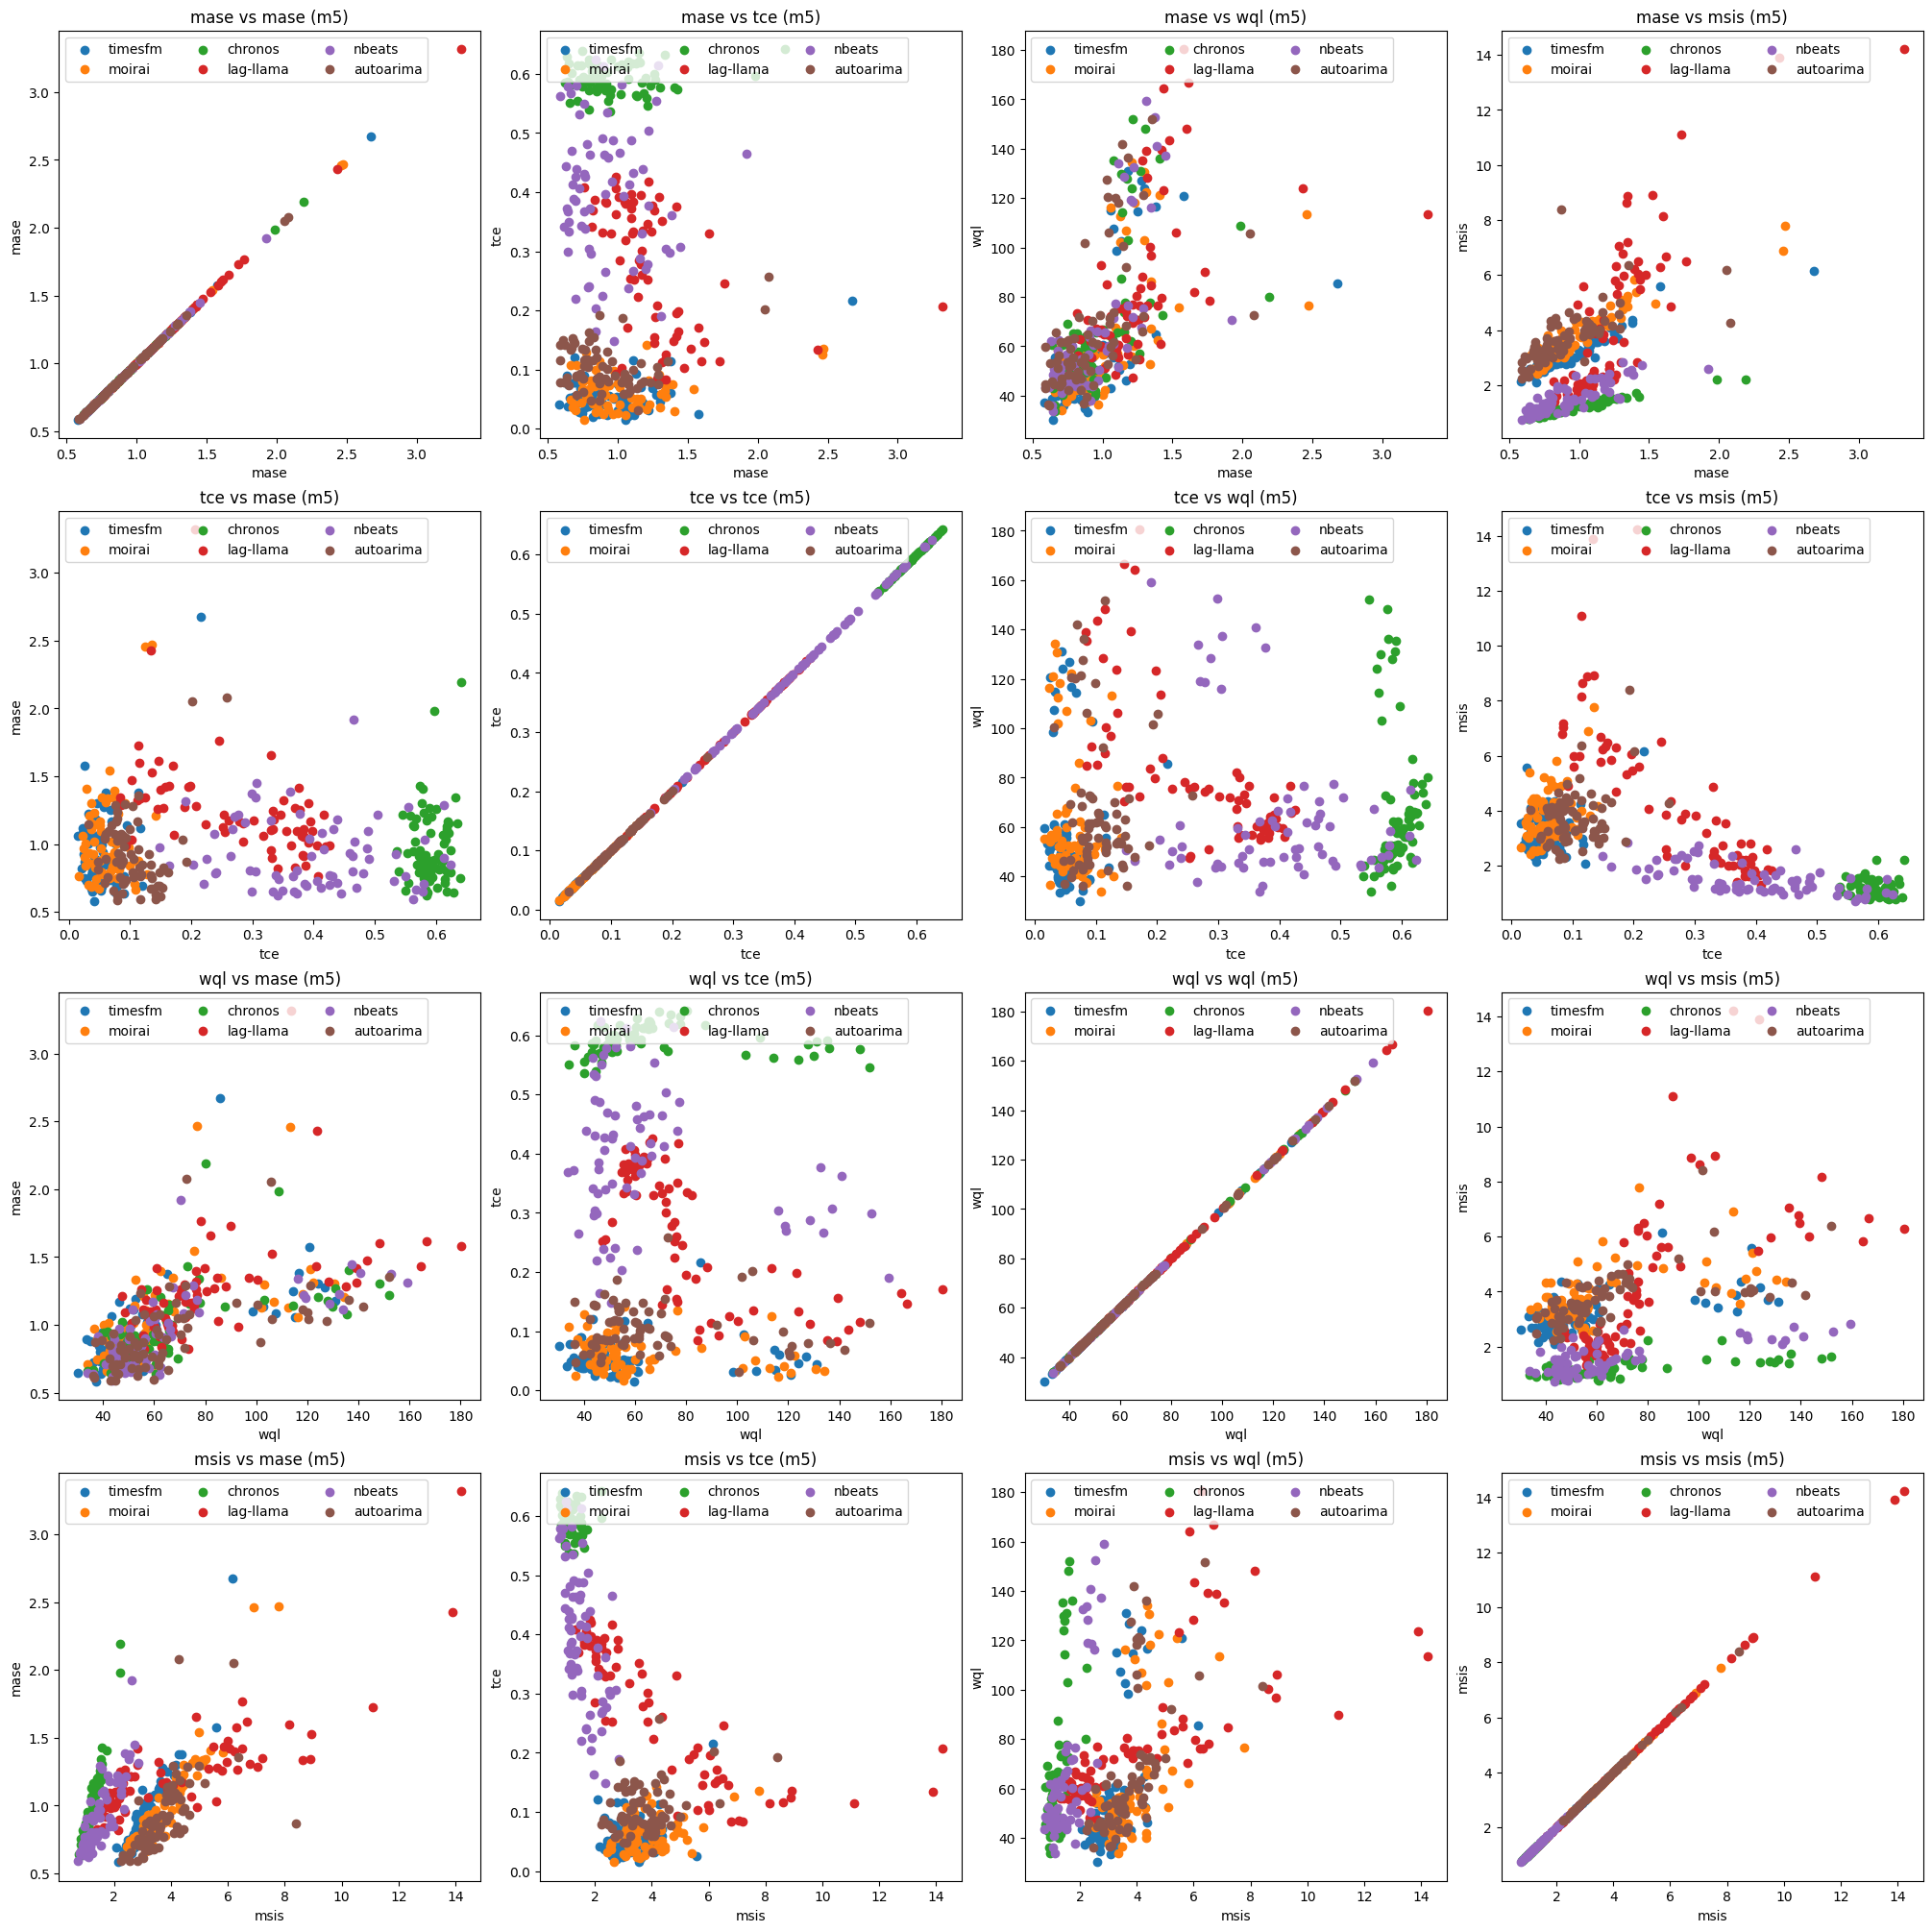

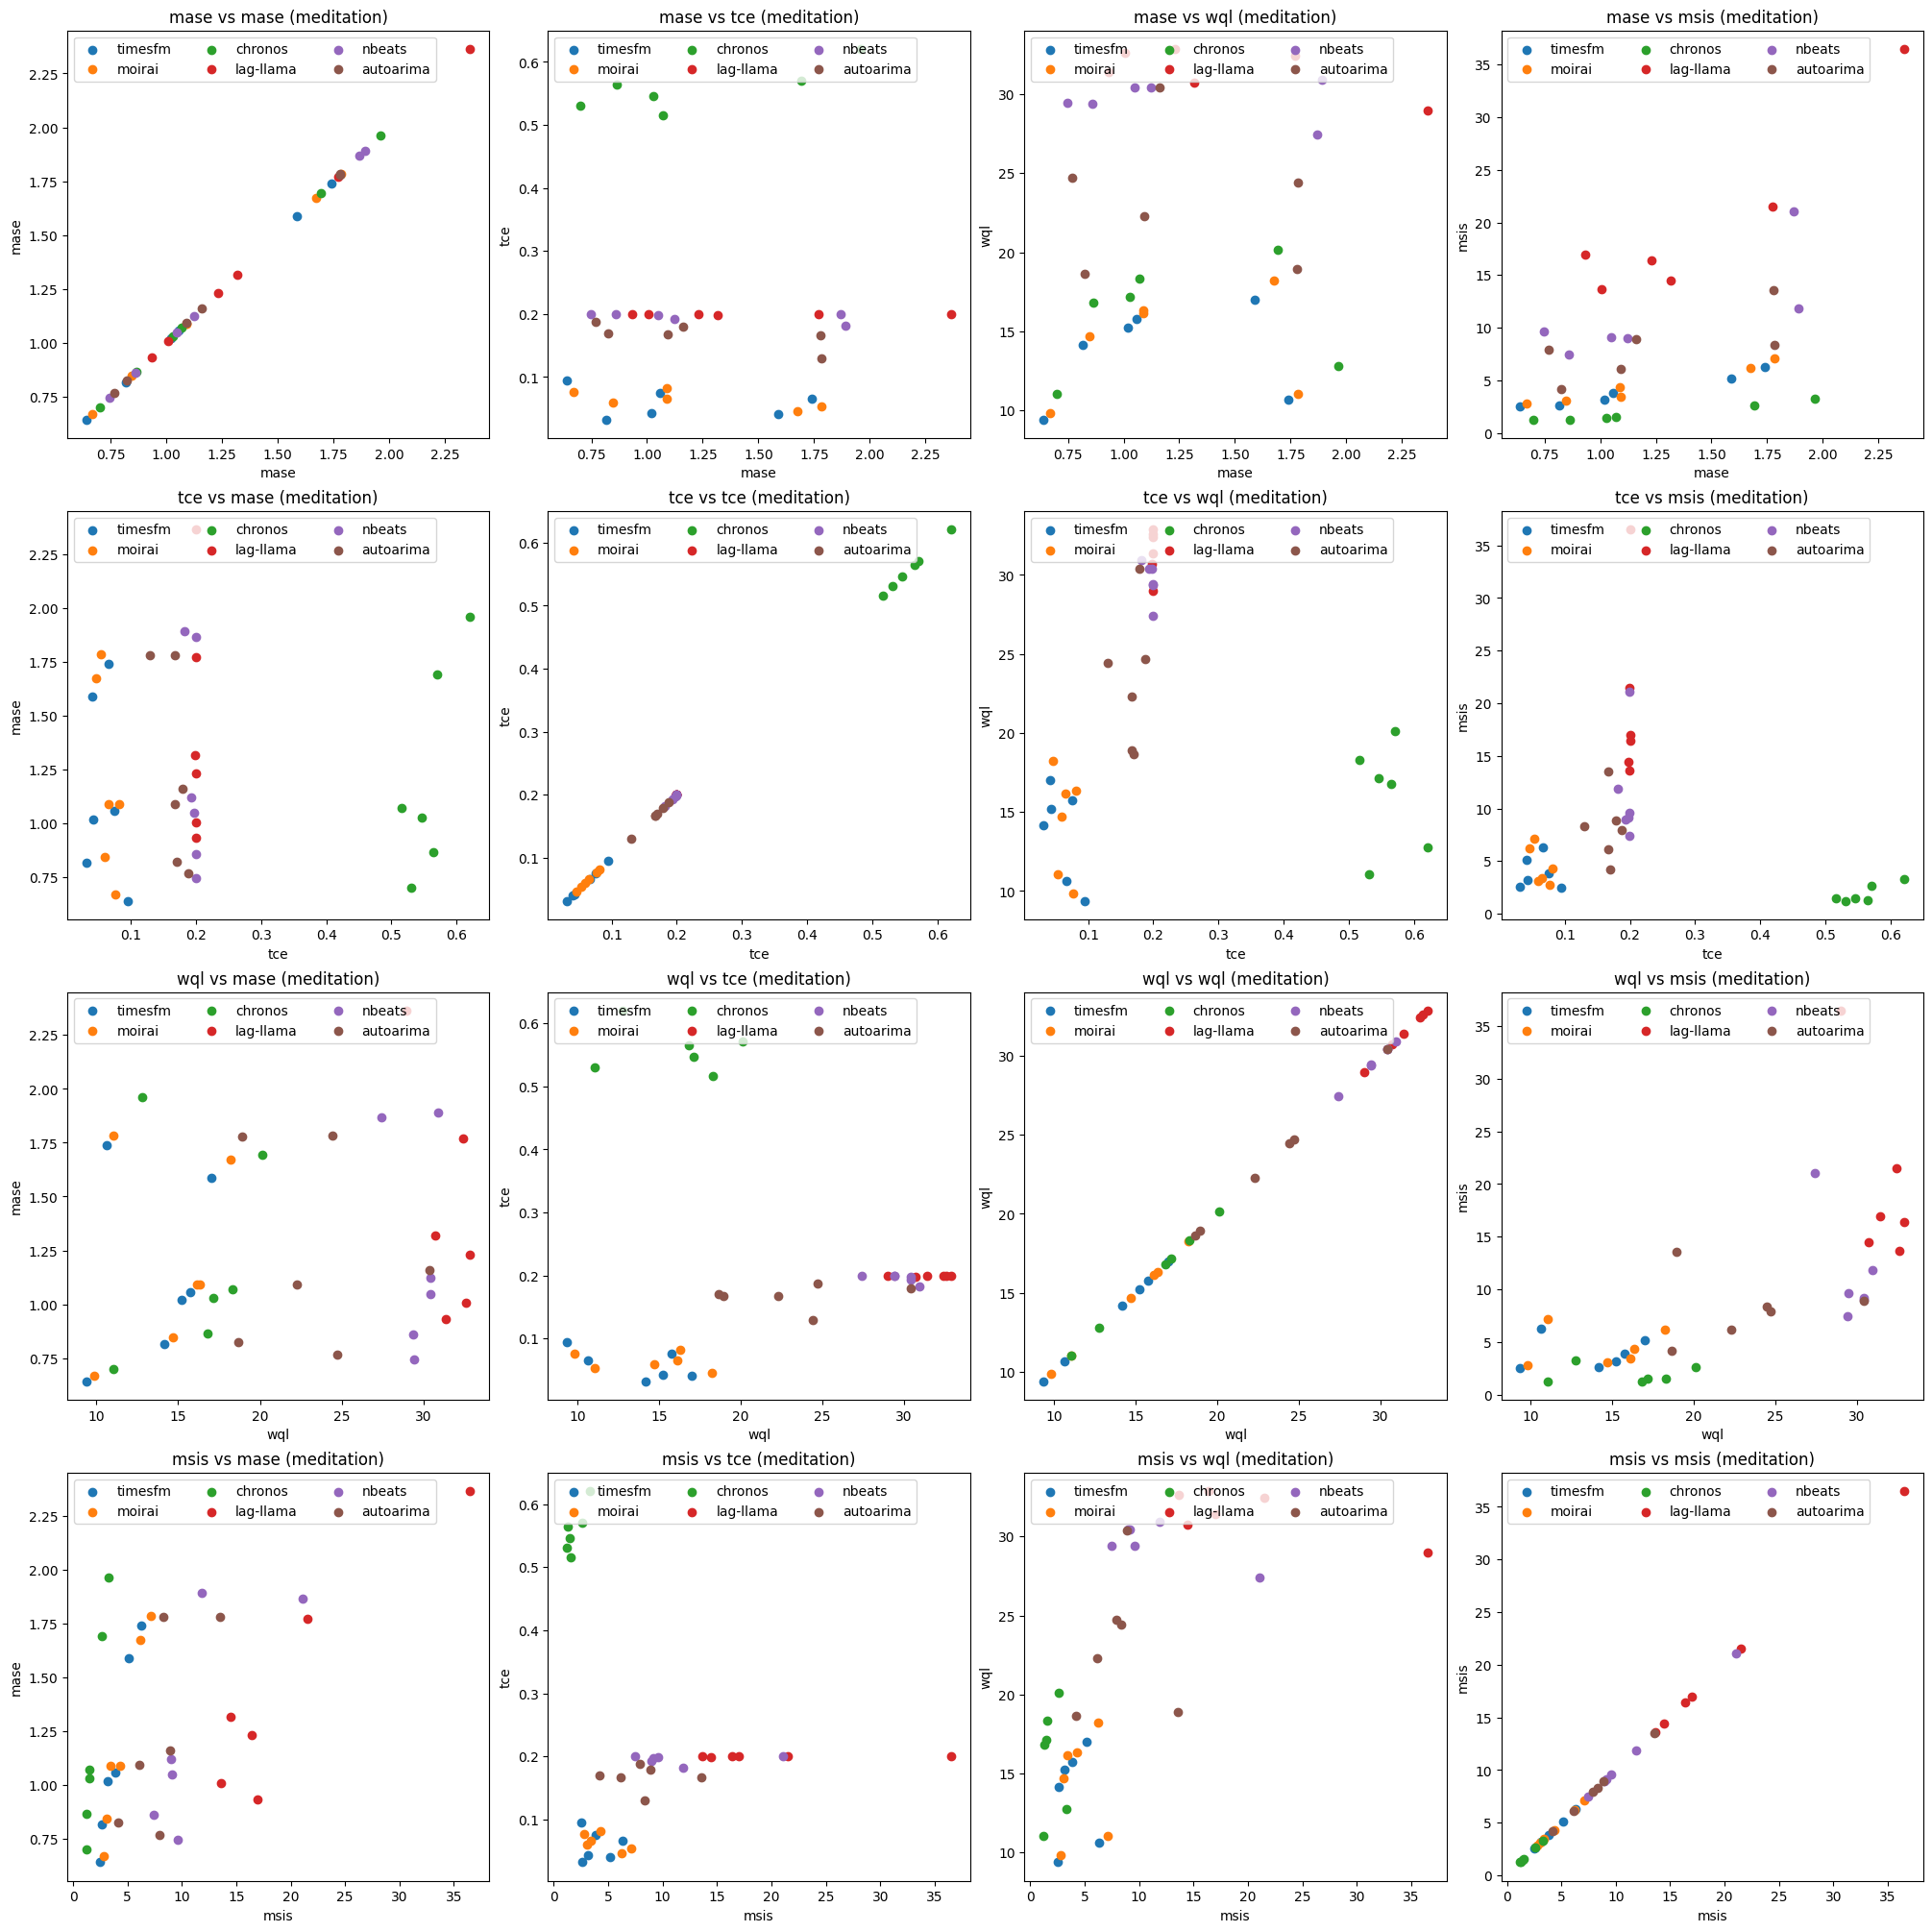

In [15]:
# Metric comparison scatter plots (individual timeseries)
for dataset in datasets:
    fig, axes = plt.subplots(4, 4, layout='constrained', figsize=(20,20))

    for i, metric_x in enumerate(metrics):
        for j, metric_y in enumerate(metrics):
            ax = axes[i, j]
            for model in models:
                time_series_ind = [str(i) for i in range(1,num_timeseries[dataset]+1)]
                x = df_timeseries.loc[(df_timeseries['model']==model) & (df_timeseries['dataset']==dataset) & (df_timeseries['metric']==metric_x), time_series_ind]
                y = df_timeseries.loc[(df_timeseries['model']==model) & (df_timeseries['dataset']==dataset) & (df_timeseries['metric']==metric_y), time_series_ind]
                ax.scatter(x, y, label=model)

            ax.set_ylabel(metric_y)
            ax.set_xlabel(metric_x)
            ax.set_title(f'{metric_x} vs {metric_y} ({dataset})')
            ax.legend(loc='upper left', ncols=3)
    plt.savefig(f'figures/scatter_plot_all_metrics_per_metrics_timeseries_{dataset}.png')
    plt.show()
        

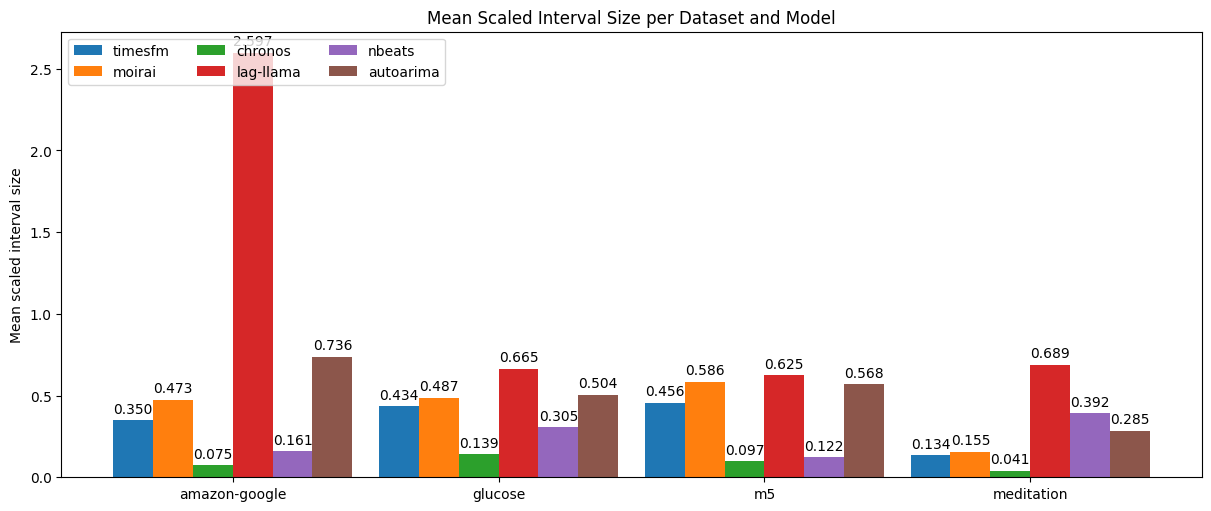

In [ ]:
# Bar plot of metrics on different datasets
fig, ax = plt.subplots(layout='constrained', figsize=(12,5))
width = 0.15
x = np.arange(len(datasets))
wql_top = 0.03

metric = 'msi_size'
multiplier = 0
for model in models:
    values = [df.loc[(df['model']==model) & (df['dataset']==dataset) & (df['metric']==metric), 'avg_result'].item() for dataset in datasets]
    offset = width * multiplier - width*(len(models)/2-1.5)
    rects = ax.bar(x + offset, values, width, label=model)
    ax.bar_label(rects, padding=3, fmt='%.3f')
    multiplier += 1

ax.set_ylabel("Mean scaled interval size")
ax.set_title(f'Mean Scaled Interval Size per Dataset and Model')
ax.set_xticks(x + width, datasets)
ax.legend(loc='upper left', ncols=3)
plt.savefig('figures/bar_plot_mean_scaled_interval_size_per_dataset_model.png')
plt.show()

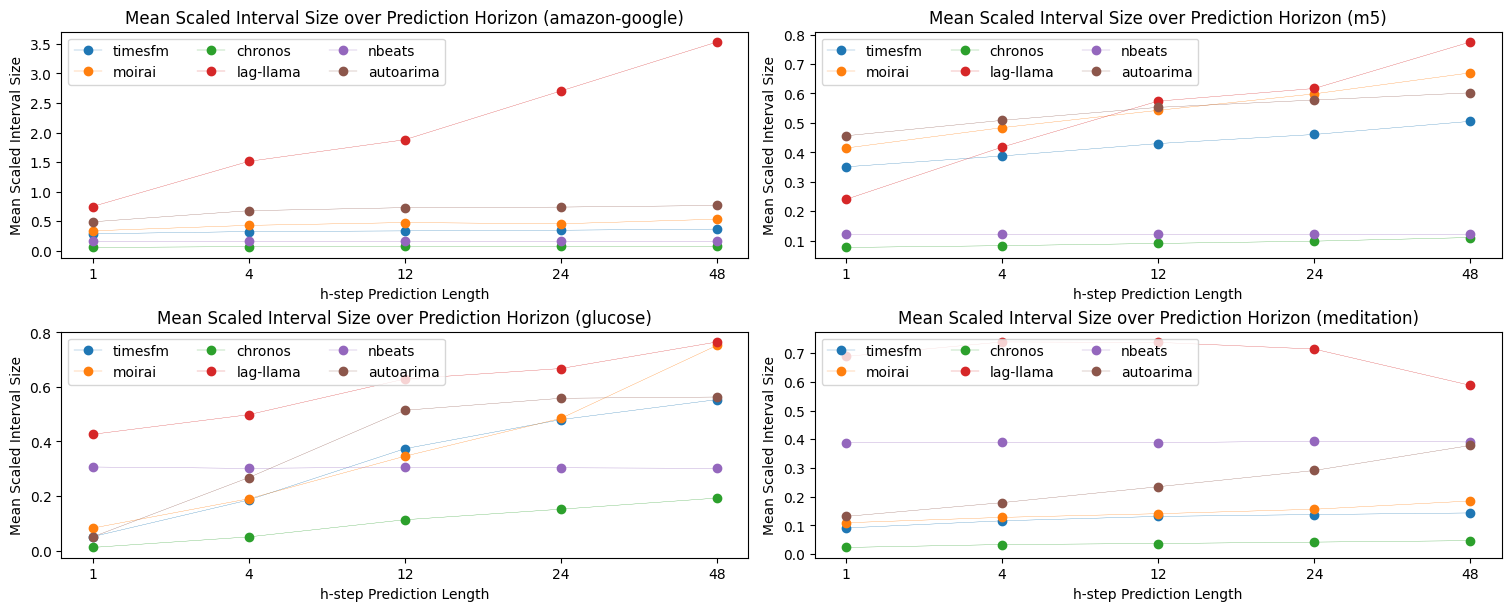

In [ ]:
# Line Plot Metrics over prediction distance
pred_horizon = ['1','4','12','24','48']
# dataset = 'amazon-google'

fig, axes = plt.subplots(2, 2, layout='constrained', figsize=(15,6))
for i, dataset in enumerate(datasets):
    ax = axes[i%2, i//2]
    for model in models:
        y = df.loc[(df['model']==model) & (df['dataset']==dataset) & (df['metric']=='msi_size'), pred_horizon].to_numpy().flatten()
        ax.plot(np.arange(len(pred_horizon)), y, label=model, marker='o', lw=0.2)

    # Add some text for labels, title and custom x-axis tick labels, etc.   
    ax.set_ylabel("Mean Scaled Interval Size")
    ax.set_xlabel("h-step Prediction Length")
    ax.set_title(f'Mean Scaled Interval Size over Prediction Horizon ({dataset})')
    ax.set_xticks(np.arange(len(pred_horizon)), pred_horizon)
    ax.legend(loc='upper left', ncols=3)
plt.savefig(f'figures/line_plot_mean_scaled_interval_size_per_pred_len.png')
plt.show()